
# Data Analysis and Visualisation 

# Project


## Summer Semester 2020



**24.07.2020**


### Name: Odedere Oluwapelumi


### Matric No: 3202465


<p style='text-align: right;'> 1 </p>

# Table of content

### 1. **Introduction** 
   - Data Presentation
   - Initilization
   - DataFrame Overview
        
### 2. **Methodology**
### 3. **Results**
### 4. **Discussion**
### 5. **References**

<p style='text-align: right;'> 2 </p>

### Introduction

In light of the recent black live matter movement (BLM), I decided to take a look at fatal shooting by Police Officers in USA. The dataset used in this project was uploaded on Kaggele.com by Andriy Samoshin $^{1}$. The dataset was collated by a Police officer in USA and spans from 2015 to 2020. The dataset contains detais such as age, race, manner of death,date, gender etc.

For the purpose of this course I will be taking a look at the first six months of 2015: analysing and visualising the information presented in the dataset in order to gain some insights to the fatal shooting and claimed Police brutality.

#### initialization

In [1]:
#Importing the necessary libraries for running Analysis and Visualsation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
from scipy import stats

In [2]:
# Reading the file as a dataframe

file = "C:\\Users\\user\\Desktop\\TUT\\Data VIs and Analysis\\dataset.csv"

data = pd.read_csv(file)
data.columns


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

#### Overview

A quick overview of the dataframe content which includes all columns for the first five rows and last five rows.

In [6]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [7]:
data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
460,583,Joe Angel Cisneros,6/26/2015,shot,gun,28.0,M,H,San Antonio,TX,False,other,Foot,False
461,580,Joshua Crittenden,6/27/2015,shot,gun,35.0,M,W,Tahlequah,OK,False,attack,Not fleeing,True
462,577,Alan Bellew,6/28/2015,shot,toy weapon,29.0,M,W,Portland,OR,False,attack,Not fleeing,False
463,585,Richard LaPort,6/29/2015,shot,gun,51.0,M,W,Edinburg,NY,True,attack,Not fleeing,False
464,586,Clay Alan Lickteig,6/30/2015,shot,gun,52.0,M,W,Franklin,NC,False,attack,Not fleeing,False


<p style='text-align: right;'> 2 </p>

### Methodology


In this analysis a few statistical methods are used on the age and gender variables in the dataset. Statistical methods used are:
- Mean: The average of values specified or the sum of the values divided by the number of values.
- Max: Maximum value of a column
- Min: Minimun value of a column
- Mode: Most common value in a column
- Frequency Density: Percentage of each unique values
- length: Counts according to the condition specified 

In [31]:
#converting the age column to numeric data  type
data['age'] = pd.to_numeric(data['age'])
data['age'].isnull().sum()

1

In [9]:
#Maximum
max(data['age'])

86.0

In [11]:
#Minimum
min(data['age'])

15.0

In [10]:
#Mean
data['age'].mean()

37.15301724137931

In [12]:
#Mode
data['age'].mode()

0    28.0
1    31.0
2    36.0
dtype: float64

In [20]:
#Count of most occuring
data['age'].value_counts().head(3)

28.0    18
36.0    18
31.0    18
Name: age, dtype: int64

In [21]:
#count of cases with ages below 18 years
agebrac = data['age']
threshold = agebrac < 18

len(agebrac[threshold])


11

In [24]:
# Calculating the frequency of individual density values
freq_density = stats.itemfreq(data["gender"])
# Calculations on frequency are transformed to DataFrame(df1)
datbar = pd.DataFrame(freq_density, columns=['gender', 'Frequency'])
F = datbar['Frequency'].iloc[0:2]
# Calculating percentage distribution (902 = number of rows)
Frequency_Density = F *100/465

C:\Users\user\Anaconda31111\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


In [25]:
datbar

,gender,Frequency
0,F,23
1,M,442


In [26]:
Frequency_Density

0    4.94624
1    95.0538
Name: Frequency, dtype: object

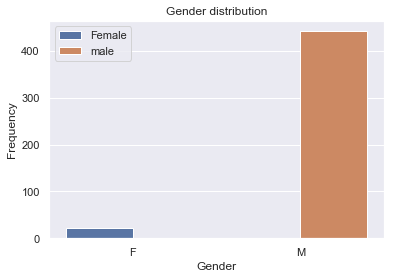

In [61]:
gend = datbar["gender"]  
Freq = datbar["Frequency"]  

#plt.bar(gend, Freq)
labels=['Female','male']
ax=sns.barplot(data=datbar, x = gend, y = Freq,hue='Frequency' )
# Easily change the labels
plt.xlabel('Gender')  
plt.ylabel('Frequency')
plt.title("Gender distribution")

h, l = ax.get_legend_handles_labels()
ax.legend(h, labels,)
plt.show() 

In [47]:
#States with the highest number of fatal shooting
state_count=data['state'].value_counts()
state_count.head()

CA    76
TX    51
FL    28
AZ    26
OK    19
Name: state, dtype: int64

In [46]:
state_count.tail()

HI    1
AK    1
ME    1
ND    1
DC    1
Name: state, dtype: int64

In [63]:
#converting the date column to a datetime series and extracting only the monnth

data['date'] = pd.to_datetime(data['date'])
from datetime import datetime as dt
data['month'] =data['date'].dt.strftime("%b")

In [64]:
# Calculating the frequency of individual month
freq_cases = stats.itemfreq(data["month"])

datbar2 = pd.DataFrame(freq_cases, columns=['Month', 'Number of cases'])

F = datbar2['Number of cases'].iloc[0:8]
Frequency_Density = F *100/465

#Sorting the month in ascending order
datbar2["sorte"]=[4,2,1,6,3,5]
datbar2=datbar2.sort_values(by="sorte",ascending=True)
datbar2

C:\Users\user\Anaconda31111\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


,Month,Number of cases,sorte
2,Jan,76,1
1,Feb,77,2
4,Mar,92,3
0,Apr,84,4
5,May,71,5
3,Jun,65,6


In [67]:
#Standard deviation of Number of cases per month
np.std(datbar2['Number of cases'])

8.69386757049665

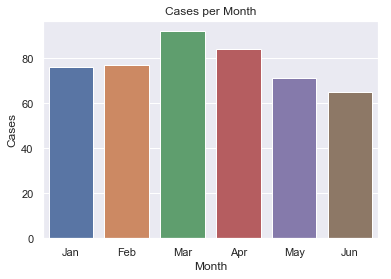

In [68]:
#Number of cases per month

months = datbar2["Month"]  
N_Freq = datbar2["Number of cases"]  

sns.barplot(x=months, y=N_Freq)

# Easily change the labels
plt.xlabel('Month')  
plt.ylabel('Cases')
plt.title("Cases per Month")
plt.show()

### Results

It is seen that from January to June 2015, the minimum age of the person involved in a fatal shooting is 15 years, while the oldest person is 86 years. The average age is 37 years, but the most common ages of people involved are **28,31,36** years with **18 occurences** each. Of the 465 cases, 11 of them are below 18 years of age. Graphical representation is shown below

Text(0.5, 1.0, 'Age histogram')

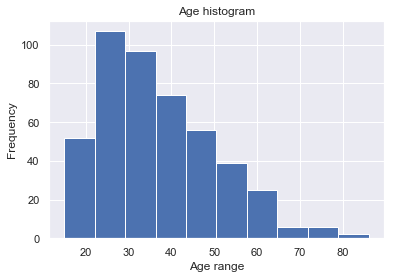

In [66]:
#Plotting Age variable Histogram
data["age"].plot.hist()
plt.xlabel('Age range')  
plt.title("Age histogram")

Taking a look at the g
ender variable statistics in the previous section, it is seen that Men (males) are more likely to be involved in a fatal shooting compared to Females as **442** of the **465** cases analysed are men.In percentage representation: approximately **95% men** and **5% women**. Graphical representation is seen in the Gender distribution graph in the previous section.

The differences between the number of cases each month does not tend to be large as the standard deviation is approximately 9 cases, however **California**$^{2}$ state stands out when it comes to total number of cases, as it contributes largely to the total fatal cases followed by **Texas**$^{2}$.

In [69]:
#Graphical representation of cases per month based on mental illness state
data["signs_of_mental_illness"] = data["signs_of_mental_illness"].astype(str)
months=['Jan','Feb','Mar','Apr','May','Jun']
datbar4=pd.DataFrame()
for m in months:
    temp_data=data.loc[data["month"]==m]    
    #freq_arms = stats.itemfreq(temp_data["signs_of_mental_illness"])
    freq_ill = np.unique(temp_data["signs_of_mental_illness"],return_counts=True,)
    datbar4 = datbar4.append(pd.DataFrame(freq_ill[1:], columns=['False', 'True']),ignore_index=True)
datbar4['month']=months


In [76]:
#Graphical representation of cases per month based on body camera usuage
data["threat_level"] = data["threat_level"].astype(str)
data["body_camera"] = data["body_camera"].astype(str)
months=['Jan','Feb','Mar','Apr','May','Jun']
datbar5=pd.DataFrame()
for m in months:
    temp_data2=data.loc[data["month"]==m]    
    #freq_arms = stats.itemfreq(temp_data["signs_of_mental_illness"])
    freq_camera = np.unique(temp_data2["body_camera"],return_counts=True,)
    datbar5 = datbar5.append(pd.DataFrame(freq_camera[1:], columns=['False', 'True']),ignore_index=True)
datbar5['month']=months


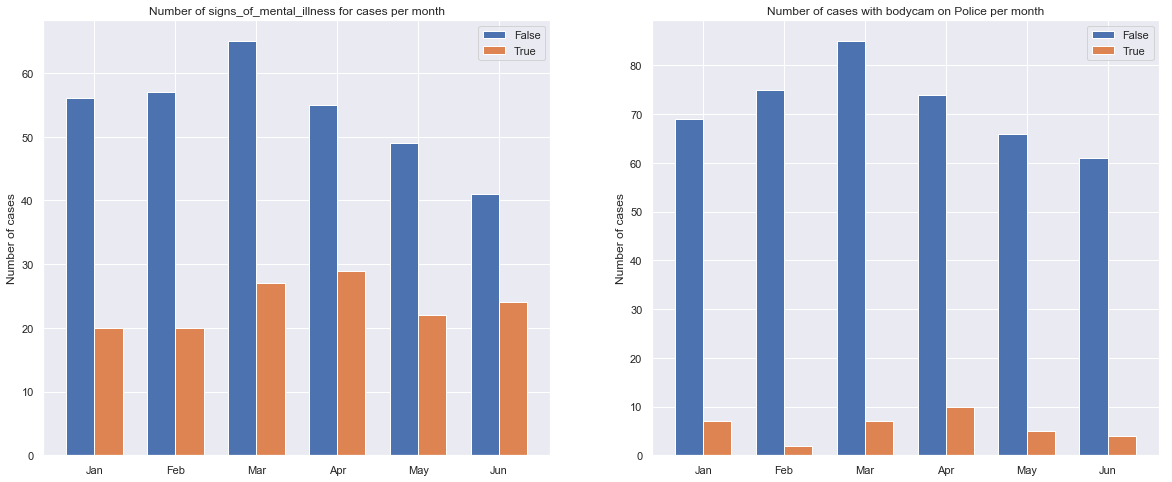

In [86]:
width = 0.35  # the width of the bars
x = np.arange(len(datbar4['month'])) 
xx = np.arange(len(datbar5['month'])) 

fig = plt.figure(figsize =(20,8))
ax = fig.add_subplot(121)
ax.bar(x - width/2, datbar4['False'], width, label='False')
ax.bar(x + width/2, datbar4['True'], width, label='True')

ax1 = fig.add_subplot(122)
ax1.bar(xx - width/2, datbar5['False'], width, label='False')
ax1.bar(xx + width/2, datbar5['True'], width, label='True')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of cases')
ax.set_title('Number of signs_of_mental_illness for cases per month')
ax.set_xticks(x)
ax.set_xticklabels(datbar4['month'])

ax1.set_ylabel('Number of cases')
ax1.set_title('Number of cases with bodycam on Police per month')
ax1.set_xticks(xx)
ax1.set_xticklabels(datbar5['month'])

ax.legend()
ax1.legend()

The above graphical representations also shows cases per month based on mental illness state and bpdy camera usage. It is seen that less than **35%** of people involved in the fatal shooting have signs of mental illness while the use of body camera is extremely low.

### Discussion

It is important to take a look at the racial distribution of the total cases provides, as it very much relates to the motivation for choosing this particular dataset. The analysis is shown below:

In [95]:
# Calculating the frequency of individual race
data["race"] = data["race"].astype(str)
freq_density = stats.itemfreq(data["race"])
# Calculations on frequency are transformed to DataFrame(df1)
datbar1 = pd.DataFrame(freq_density, columns=['race','Frequency1'])

#sorting the dataframe
datbar1["sorter"]=[1,2,4,3,5,6,7]
datbar1=datbar1.sort_values(by="sorter",ascending=True)

F = datbar1['Frequency1'].iloc[0:8]
# Calculating percentage distribution 
Frequency_Density = F *100/465

C:\Users\user\Anaconda31111\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


W: White, non-Hispanic B: Black, non-Hispanic A: Asian N: Native American H: Hispanic O: Other None: unknown

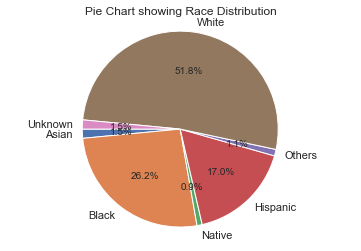

In [101]:

#Define the labels for your slices
labels = 'Asian', 'Black', 'Native', 'Hispanic',  'Others', 'White', 'Unknown'
#Define the size of the slices.
sizes = Frequency_Density

# Defining that everything is plotted together.
fig1, ax1 = plt.subplots()

# Filling the pie with information
# Now, that we defined the plot above it's not necessary to use plt. in front of plot related functions, e.g. ax1.pie()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Add a title
plt.title("Pie Chart showing Race Distribution")

plt.show()

From the pie chart above the White race accounts for more than half of the total fatal cases (January - June 2015) then folllowed by the Black race living in USA. However it further analysis can be done to ascertain the ratio of the total population of each race to the number of cases presented here.

Also, a look into the "armed" state of people involved in this fatal cases, shows over 50% were armed with guns followed by Knives. A stricter gun control law should reduce the frequency of cases drastically. The graph is displayed below.

In [73]:
data["armed"] = data["armed"].astype(str)
freq_arms = stats.itemfreq(data["armed"])
# Calculations on frequency are transformed to DataFrame(df1)
datbar3 = pd.DataFrame(freq_arms, columns=['Arm_type', 'Arm_Frequency'])
F3 = datbar3['Arm_Frequency'].iloc[0:8]


C:\Users\user\Anaconda31111\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


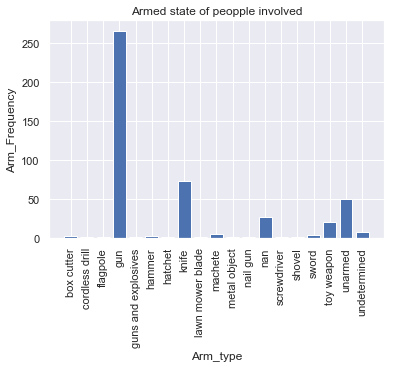

In [103]:
Arm_type = datbar3["Arm_type"]  
Arm_Frequency = datbar3["Arm_Frequency"]  

plt.bar(Arm_type, Arm_Frequency)
plt.xticks(rotation=90)
# Easily change the labels
plt.xlabel('Arm_type')  
plt.ylabel('Arm_Frequency')
plt.title('Armed state of peopple involved')
plt.show()

The large difference in gender statistic is also alarming. As more males are involved in ratio 1 woman to 19 men. More social rehabilitation$^{3}$ should be targeted towards men especially in the age bracket 25 to 40 (as seen in the graph below), this should ultimately reduce the trend. 

Text(0.5, 1.0, 'Sign of Mental Illness with respect to age')

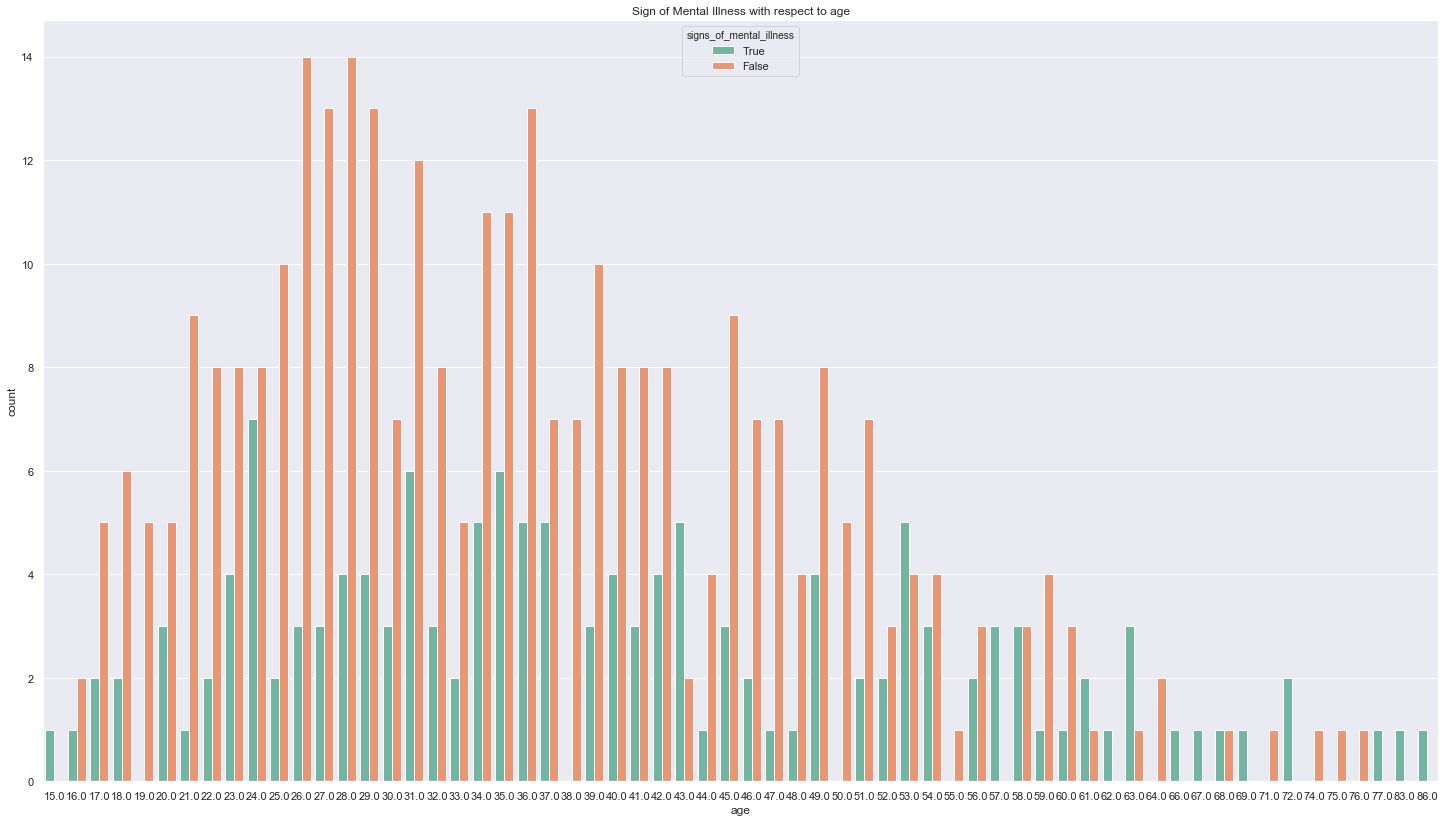

In [109]:
sns.set(rc={'figure.figsize':(25, 14)})
sns.countplot(x = "age", hue = "signs_of_mental_illness",data = data, palette = 'Set2')
plt.title('Sign of Mental Illness with respect to age')

### References

1. Andriy Samoshin, Data Police shootings https://www.kaggle.com/mrmorj/data-police-shootings. (Accessed: 01.07.2020).
2. List of All 50 US State Abbreviations, https://abbreviations.yourdictionary.com/articles/state-abbrev.html (Accessed: 18.07.2020).
3. Pam M.S. SOCIAL REHABILITATION. https://psychologydictionary.org/social-rehabilitation/#:~:text=The%20achievement%20of%20a%20higher,with%20physical%20impairments%20or%20disabilities. (Created: April 13, 2013, Accessed: 23.07.2020).